# Pymaceuticals Inc.
---

### Analysis

- The cancer experiment was performed on mice, who were administered at different time intervals one of a set of drugs. Tumor volume was recorded over time of the drug administration. In terms of background information, the gender distribution varied from drug to drug. The weight was consistent for the drugs at 27 ounces. A total of 249 mice participated in the study, and the results were tracked by tumor volume and across different time periods.
In terms of tumor volume by drug regimen, the mean and median tumor volumes were lower for Ramicane and Capomulin, potentially pointing to the superiority of the drugs in the treatment of cancer. In this regard, it is important to note that Naftisol and Stelasyn tumor volumes were similar to placebo, and Ketapril tumor volumes were higher than placebo. This information indicates that the cancer drugs have different efficacy profiles.
Between 180 and 220 mice were tested, which includes many administrations recordings for the same mouse. The most mice were tested for Capomulin and Ramicane (220 mice).
The tumor volume declined from 45 to 25 over administration from time 0 to 50 for the Capomulin administered mouse. Mice with higher weight had higher values for tumors. The analysis demonstrated that mice and weight were indeed positively correlated, with an increase in weight, there was an upward trend in tumor volumes.


In [181]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/content/Mouse_metadata.csv"
study_results_path = "/content/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_metadata_study_results=pd.merge(mouse_metadata,study_results,how="outer",on="Mouse ID")

# Display the data table for preview
mouse_metadata_study_results.head()
#mouse_metadata_study_results.groupby("Drug Regimen")["Sex"].value_counts()
#mouse_metadata_study_results.groupby("Drug Regimen")["Weight (g)"].mean()
mouse_metadata_study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [56]:
# Checking the number of mice by the Mouse ID:
uniquemice=mouse_metadata_study_results["Mouse ID"].nunique()
uniquemice
#Answer: There are 249 mice in the dataset

249

In [59]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
subset1=mouse_metadata_study_results[mouse_metadata_study_results.duplicated(subset=["Mouse ID","Timepoint"])]
subset1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
subset2=mouse_metadata_study_results[mouse_metadata_study_results.duplicated(subset=["Mouse ID"])]
subset2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [73]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_metadata_study_results1=mouse_metadata_study_results.reset_index()
mouse_metadata_study_results1.drop_duplicates(subset="Mouse ID",inplace=True)
(mouse_metadata_study_results1)

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.0,0
10,10,s185,Capomulin,Female,3,17,0,45.0,0
20,20,x401,Capomulin,Female,16,15,0,45.0,0
30,30,m601,Capomulin,Male,22,17,0,45.0,0
40,40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...,...
1858,1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,1860,z435,Propriva,Female,12,26,0,45.0,0
1863,1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,1873,z795,Naftisol,Female,13,29,0,45.0,0


In [74]:
# Checking the number of mice in the clean DataFrame.
len(mouse_metadata_study_results1)

249

## Summary Statistics

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_metadata_study_results["Drug Regimen"].value_counts()
capomulin=mouse_metadata_study_results[mouse_metadata_study_results["Drug Regimen"]=="Capomulin"]
cap1=capomulin.describe()
cap2=st.sem(mouse_metadata_study_results["Drug Regimen"]=="Capomulin")
ramicane=mouse_metadata_study_results[mouse_metadata_study_results["Drug Regimen"]=="Ramicane"]
ramicane1=ramicane.describe()
ramicane2=st.sem(mouse_metadata_study_results["Drug Regimen"]=="Ramicane")
ketapril=mouse_metadata_study_results[mouse_metadata_study_results["Drug Regimen"]=="Ketapril"]
ketapril1=ketapril.describe()
ketapril2=st.sem(mouse_metadata_study_results["Drug Regimen"]=="Ketapril")
naftisol=mouse_metadata_study_results[mouse_metadata_study_results["Drug Regimen"]=="Naftisol"]
naftisol1=naftisol.describe()
naftisol2=st.sem(mouse_metadata_study_results["Drug Regimen"]=="Naftisol")
zoniferol=mouse_metadata_study_results[mouse_metadata_study_results["Drug Regimen"]=="Zoniferol"]
zoniferol1=zoniferol.describe()
zoniferol2=st.sem(mouse_metadata_study_results["Drug Regimen"]=="Zoniferol")
placebo=mouse_metadata_study_results[mouse_metadata_study_results["Drug Regimen"]=="Placebo"]
placebo1=placebo.describe()
placebo2=st.sem(mouse_metadata_study_results["Drug Regimen"]=="Placebo")
stelasyn=mouse_metadata_study_results[mouse_metadata_study_results["Drug Regimen"]=="Stelasyn"]
stelasyn1=stelasyn.describe()
stelasyn2=st.sem(mouse_metadata_study_results["Drug Regimen"]=="Stelasyn")
infubinol=mouse_metadata_study_results[mouse_metadata_study_results["Drug Regimen"]=="Infubinol"]
infubinol1=infubinol.describe()
infubinol2=st.sem(mouse_metadata_study_results["Drug Regimen"]=="Infubinol")
cetfamin=mouse_metadata_study_results[mouse_metadata_study_results["Drug Regimen"]=="Ceftamin"]
cetfamin1=cetfamin.describe()
cetfamin2=st.sem(mouse_metadata_study_results["Drug Regimen"]=="Cetfamin")
propriva=mouse_metadata_study_results[mouse_metadata_study_results["Drug Regimen"]=="Propriva"]
propriva1=propriva.describe()
propriva2=st.sem(mouse_metadata_study_results["Drug Regimen"]=="Propriva")
df1=pd.DataFrame({"drug_class":["Capomulin","Ramicane","Ketapril","Natfisol","Zoniferol","Placebo","Stelasyn","Infubinol","Cetfamin","Propriva"],
"summary_statistics":[cap1,ramicane1,ketapril1,naftisol1,zoniferol1,placebo1,stelasyn1,infubinol1,cetfamin1,propriva1]})
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
cap1summary=cap1["Tumor Volume (mm3)"].describe()
cap1sem=st.sem(cap1["Tumor Volume (mm3)"])
ramicane1summary=ramicane1["Tumor Volume (mm3)"].describe()
ramicane1sem=st.sem(ramicane1["Tumor Volume (mm3)"])
ketaprilsummary=ketapril1["Tumor Volume (mm3)"].describe()
ketaprilsem=st.sem(ketapril1["Tumor Volume (mm3)"])
naftisolsummary=naftisol1["Tumor Volume (mm3)"].describe()
naftisolsem=st.sem(naftisol1["Tumor Volume (mm3)"])
zoniferolsummary=zoniferol1["Tumor Volume (mm3)"].describe()
zoniferolsem=st.sem(zoniferol1["Tumor Volume (mm3)"])
placebosummary=placebo1["Tumor Volume (mm3)"].describe()
placebosem=st.sem(placebo1["Tumor Volume (mm3)"])
stelasynsummary=stelasyn1["Tumor Volume (mm3)"].describe()
stelasynsem=st.sem(stelasyn1["Tumor Volume (mm3)"])
cetfamin1summary=cetfamin1["Tumor Volume (mm3)"].describe()
cetfamin1sem=st.sem(cetfamin1["Tumor Volume (mm3)"])
propriva1summary=propriva1["Tumor Volume (mm3)"].describe()
propriva1sem=st.sem(propriva1["Tumor Volume (mm3)"])
df2=pd.DataFrame({"summaries":["cap1summary","ramicane1summary","ketapril1summary","natfisolsummary","zoniferolsummary","placebosummary","stelasynsummary","cetfamin1summary","propriva1summary"],"values":[cap1summary,ramicane1summary,ketaprilsummary,naftisolsummary,zoniferolsummary,placebosummary,stelasynsummary,cetfamin1summary,propriva1summary]})
df2.T

,0,1,2,3,4,5,6,7,8
summaries,cap1summary,ramicane1summary,ketapril1summary,natfisolsummary,zoniferolsummary,placebosummary,stelasynsummary,cetfamin1summary,propriva1summary
values,"count 8.000000 mean 58.927008 std 70.545571 min 4.994774 25% 34.100349 50% 41.116775 75% 45.789552 max 230.000000 Name: Tumor Volume (mm3), dtype: float64","count 8.000000 mean 58.135483 std 70.066784 min 4.846308 25% 33.018508 50% 40.444990 75% 45.655704 max 228.000000 Name: Tumor Volume (mm3), dtype: float64","count 8.000000 mean 67.235630 std 52.659979 min 8.279709 25% 47.424740 50% 54.467190 75% 65.294967 max 188.000000 Name: Tumor Volume (mm3), dtype: float64","count 8.000000 mean 66.236660 std 52.109202 min 8.134708 25% 46.714405 50% 53.420425 75% 64.139480 max 186.000000 Name: Tumor Volume (mm3), dtype: float64","count 8.000000 mean 64.704768 std 50.989076 min 6.966589 25% 46.753407 50% 52.527493 75% 61.796802 max 182.000000 Name: Tumor Volume (mm3), dtype: float64","count 8.000000 mean 65.091555 std 50.438334 min 7.821003 25% 46.844290 50% 53.161257 75% 63.240935 max 181.000000 Name: Tumor Volume (mm3), dtype: float64","count 8.000000 mean 65.283179 std 50.484335 min 7.710419 25% 47.285354 50% 53.332443 75% 62.820395 max 181.000000 Name: Tumor Volume (mm3), dtype: float64","count 8.000000 mean 63.321071 std 49.747753 min 6.268188 25% 46.656320 50% 52.183665 75% 59.831874 max 178.000000 Name: Tumor Volume (mm3), dtype: float64","count 8.000000 mean 61.425766 std 44.320795 min 6.507770 25% 46.560814 50% 51.588592 75% 60.252353 max 161.000000 Name: Tumor Volume (mm3), dtype: float64"


In [182]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df3=mouse_metadata_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()
df3


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

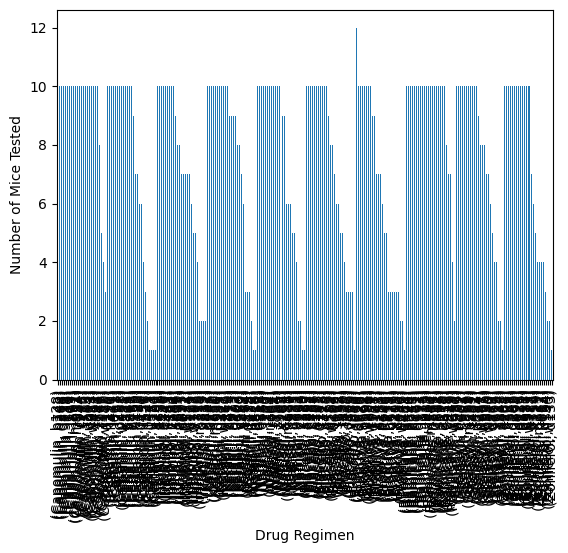

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts1=mouse_metadata_study_results.groupby("Drug Regimen")["Mouse ID"].value_counts()
counts1.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

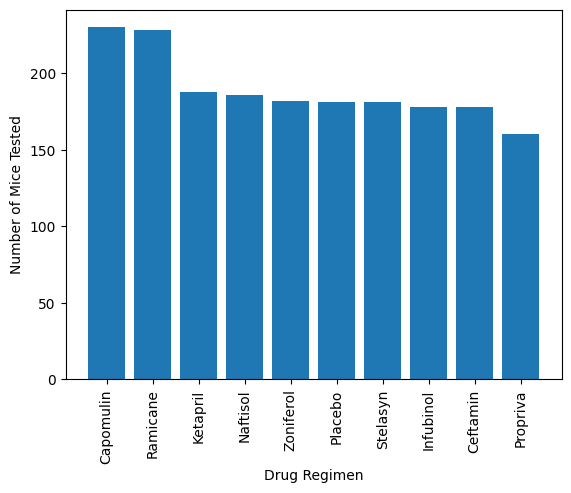

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts2=mouse_metadata_study_results["Drug Regimen"].value_counts()
plt.bar(counts2.index.values, counts2.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

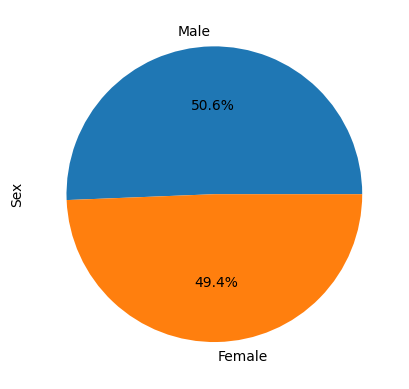

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts=mouse_metadata_study_results.Sex.value_counts()
counts.plot(kind="pie",autopct="%1.1f%%")
plt.show()

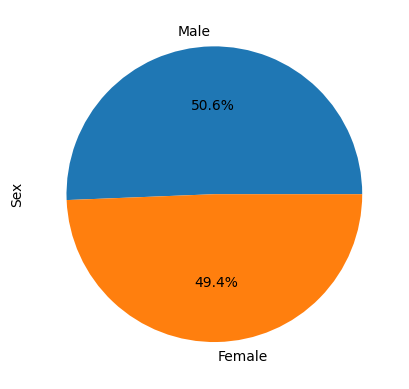

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts2=mouse_metadata_study_results.Sex.value_counts()
plt.pie(counts.values,labels=counts.index.values,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_metadata_study_results.groupby(["Drug Regimen","Mouse ID"])[["Tumor Volume (mm3)"]].sum()[0:50]
mouse_metadata_study_results.groupby(["Drug Regimen","Mouse ID"])[["Tumor Volume (mm3)"]].sum()[51:100]
mouse_metadata_study_results.groupby(["Drug Regimen","Mouse ID"])[["Tumor Volume (mm3)"]].sum()[101:150]
mouse_metadata_study_results.groupby(["Drug Regimen","Mouse ID"])[["Tumor Volume (mm3)"]].sum()[151:200]
mouse_metadata_study_results.groupby(["Drug Regimen","Mouse ID"])[["Tumor Volume (mm3)"]].sum()[201:250]
# Start by getting the last (greatest) timepoint for each mouse
mouse_metadata_study_results.groupby(["Drug Regimen","Mouse ID"])[["Timepoint"]].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
subset3=mouse_metadata_study_results.groupby(["Drug Regimen","Mouse ID"])[["Timepoint"]].max().reset_index()
subset4=pd.merge(subset3,mouse_metadata_study_results,on="Mouse ID",how="inner")
subset5=subset4[['Drug Regimen_x','Mouse ID','Timepoint_x','Tumor Volume (mm3)']]
subset5[0:50]
subset5[51:100]
subset5[101:150]
subset5[151:200]

,Drug Regimen_x,Mouse ID,Timepoint_x,Tumor Volume (mm3)
151,Capomulin,s185,45,36.866876
152,Capomulin,s185,45,33.949940
153,Capomulin,s185,45,32.959671
154,Capomulin,s185,45,28.328531
155,Capomulin,s185,45,25.472143
156,Capomulin,s185,45,23.343598
157,Capomulin,s710,45,45.000000
158,Capomulin,s710,45,43.180977
159,Capomulin,s710,45,43.688026
160,Capomulin,s710,45,41.845235


In [174]:
# Put treatments into a list for for loop (and later for plot labels)
lists=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data=[]
capomulin3=mouse_metadata_study_results[mouse_metadata_study_results['Drug Regimen']=='Capomulin']
ramicane3=mouse_metadata_study_results[mouse_metadata_study_results['Drug Regimen']=='Ramicane']
infubinol3=mouse_metadata_study_results[mouse_metadata_study_results['Drug Regimen']=='Infubinol']
ceftamin3=mouse_metadata_study_results[mouse_metadata_study_results['Drug Regimen']=='Ceftamin']
quartiles1 = capomulin3.quantile([.25,.5,.75])
quartiles1
quartiles2 = ramicane3.quantile([.25,.5,.75])
quartiles2
quartiles3 = infubinol3.quantile([.25,.5,.75])
quartiles3
quartiles4 = ceftaminl3.quantile([.25,.5,.75])
quartiles4
# Calculate the IQR and quantitatively determine if there are any potential outliers.
iqrcapomulin=quartiles1.iloc[2,3]-quartiles1.iloc[0,3]
iqramicane=quartiles2.iloc[2,3]-quartiles2.iloc[0,3]
iqrinfubinol=quartiles3.iloc[2,3]-quartiles3.iloc[0,3]
iqrceftamin=quartiles4.iloc[2,3]-quartiles4.iloc[0,3]


    # Locate the rows which contain mice on each drug and get the tumor volumes
capomulin3.index
ramicane3.index
infubinol3.index
ceftamin3.index
    # add subset


    # Determine outliers using upper and lower bounds
cap31=capomulin3['Tumor Volume (mm3)']>=1.5*quartiles1.iloc[2,3]
cap32=capomulin3['Tumor Volume (mm3)']<=1.5*quartiles1.iloc[0,3]
ram31=ramicane3['Tumor Volume (mm3)']>=1.5*quartiles2.iloc[2,3]
ram32=ramicane3['Tumor Volume (mm3)']<=1.5*quartiles2.iloc[0,3]
inf31=infubinol3['Tumor Volume (mm3)']>=1.5*quartiles3.iloc[2,3]
inf32=infubinol3['Tumor Volume (mm3)']<=1.5*quartiles3.iloc[0,3]
cef31=ceftamin3['Tumor Volume (mm3)']>=1.5*quartiles4.iloc[2,3]
cef32=ceftamin3['Tumor Volume (mm3)']<=1.5*quartiles4.iloc[0,3]

<ipython-input-174-6b1bdf2b0771>:10: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quartiles1 = capomulin3.quantile([.25,.5,.75])
<ipython-input-174-6b1bdf2b0771>:12: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quartiles2 = ramicane3.quantile([.25,.5,.75])
<ipython-input-174-6b1bdf2b0771>:14: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quartiles3 = infubinol3.quantile([.25,.5,.75])
<ipython-input-174-6b1bdf2b0771>:16: FutureWarning: The default value of numeric

<Axes: >

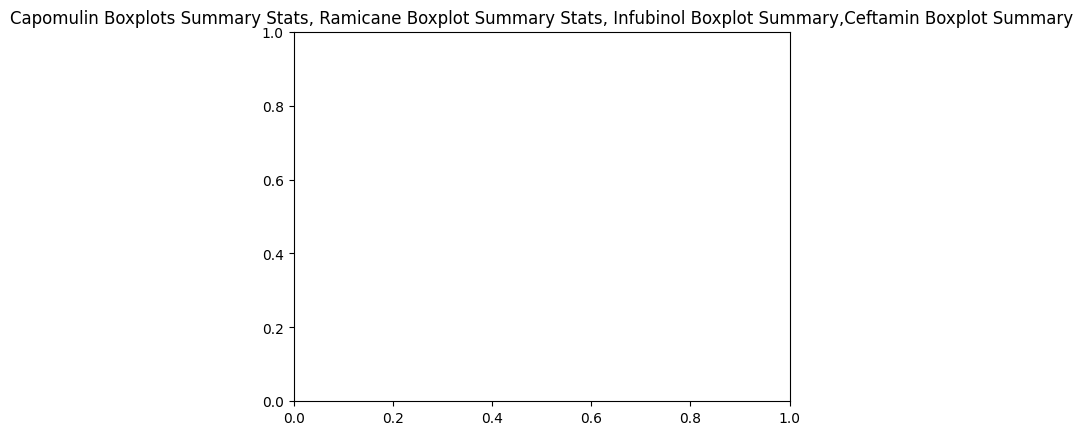

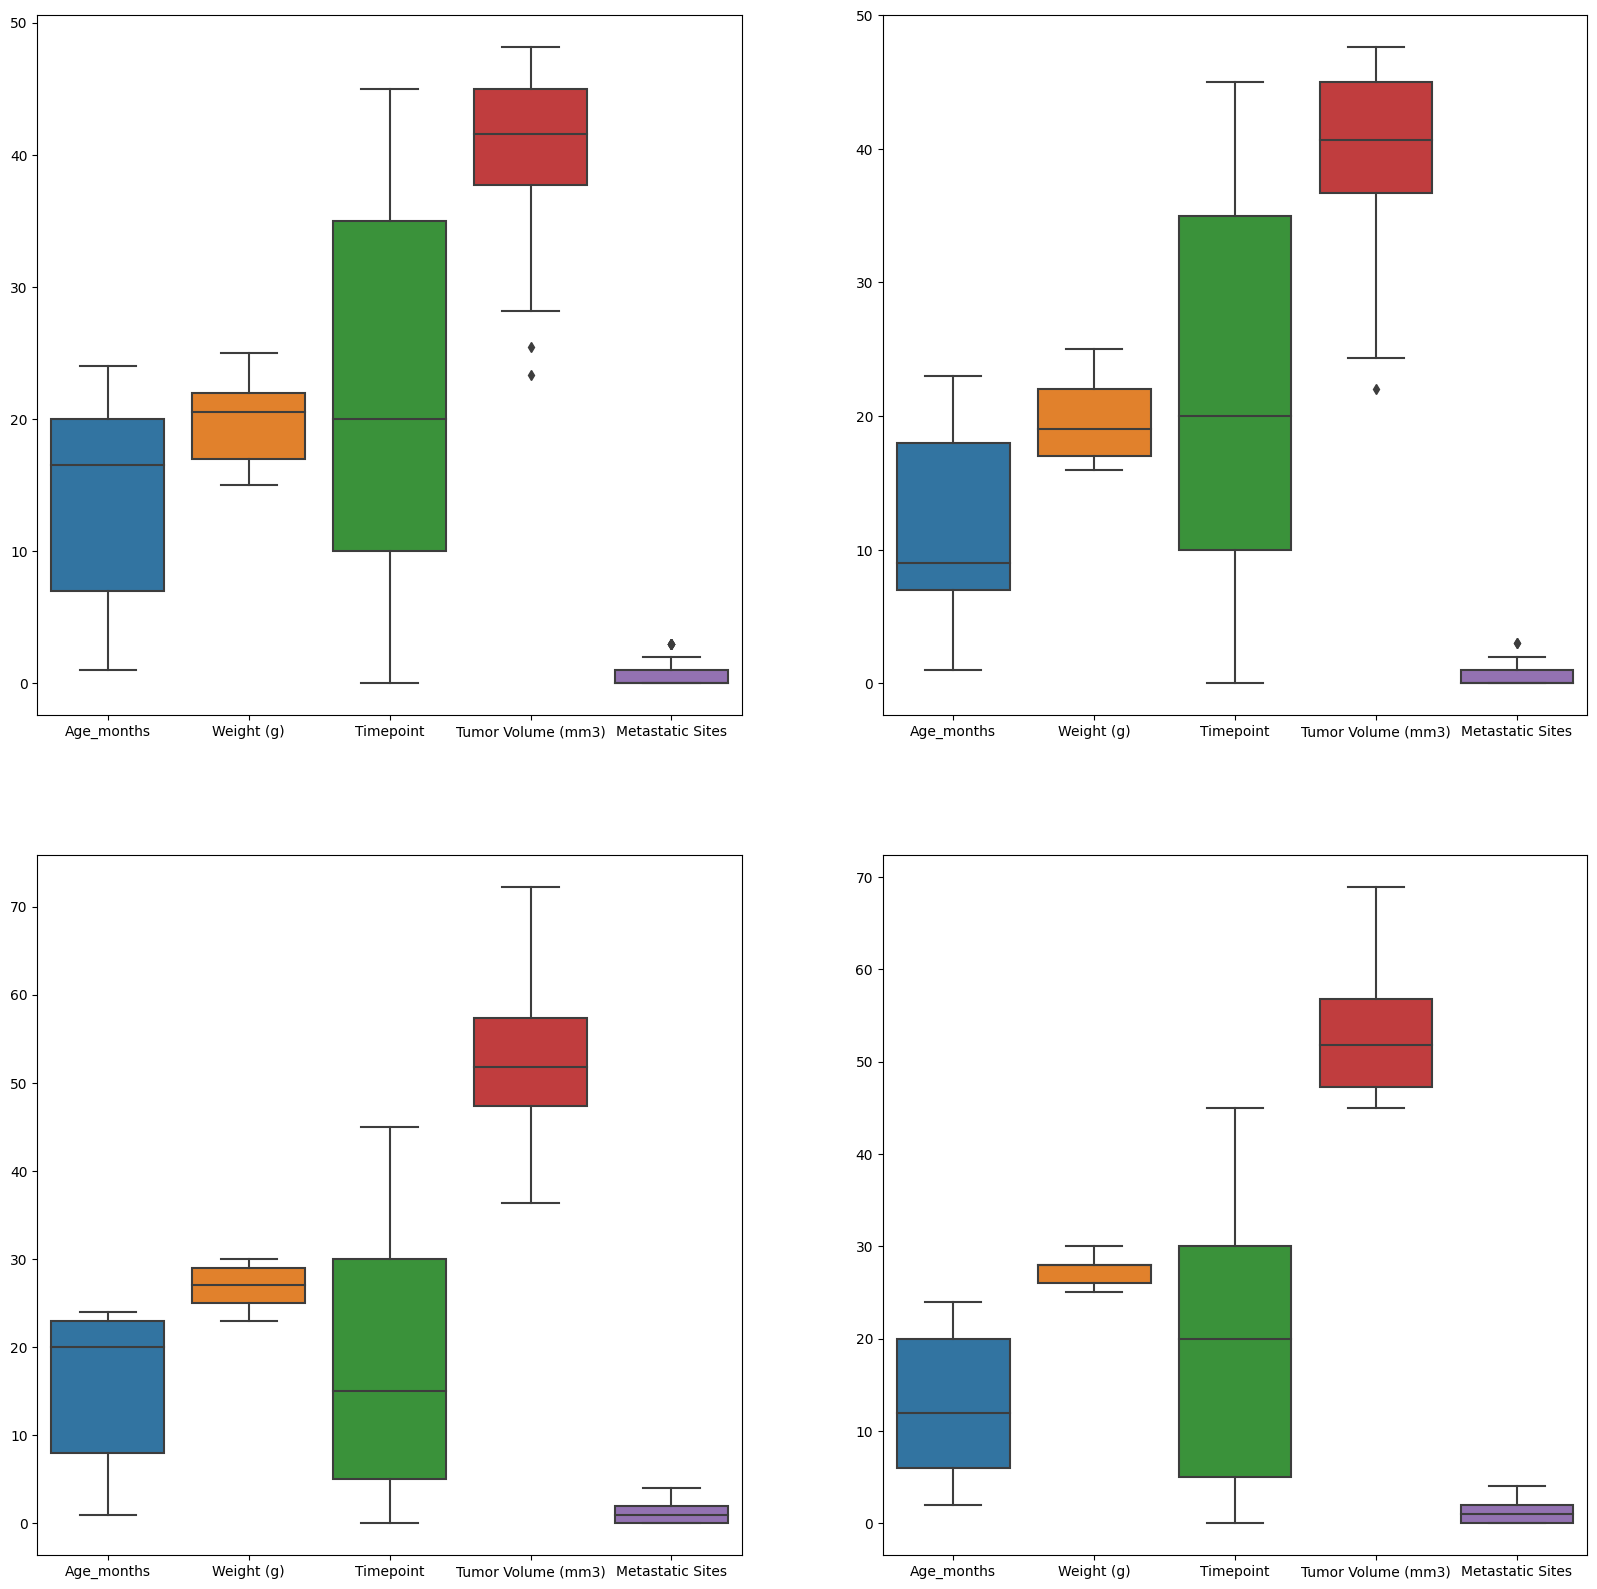

In [172]:
plt.title("Capomulin Boxplots Summary Stats, Ramicane Boxplot Summary Stats, Infubinol Boxplot Summary,Ceftamin Boxplot Summary")
fig, axes = plt.subplots(figsize=(20,20),nrows=2, ncols=2)
sns.boxplot(capomulin3,ax=axes[0,0])
sns.boxplot(ramicane3,ax=axes[0,1])
sns.boxplot(infubinol3,ax=axes[1,0])
sns.boxplot(ceftamin3,ax=axes[1,1])

## Line and Scatter Plots

Text(0, 0.5, 'Timepoint')

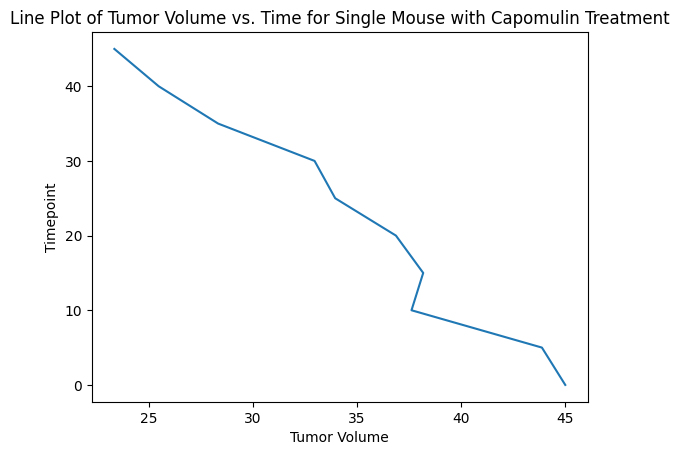

In [150]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse=capomulin3[capomulin3["Mouse ID"]=="s185"]
fig,ax=plt.subplots()
plt.title("Line Plot of Tumor Volume vs. Time for Single Mouse with Capomulin Treatment")
plt.plot(mouse["Tumor Volume (mm3)"],mouse["Timepoint"])
ax.set_xlabel('Tumor Volume')
ax.set_ylabel('Timepoint')


Text(0, 0.5, 'Tumor Volume (mm3)')

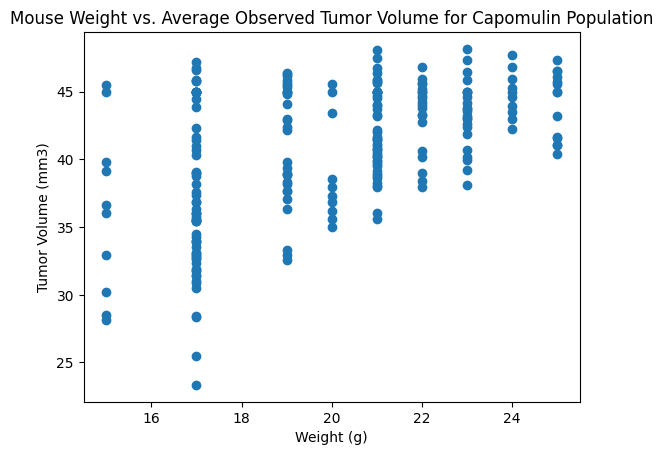

In [157]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin3
fig,ax=plt.subplots()
plt.scatter(capomulin3["Weight (g)"],capomulin3["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs. Average Observed Tumor Volume for Capomulin Population")
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Tumor Volume (mm3)')

## Correlation and Regression

<Axes: title={'center': 'Linear Regression Model for Mouse Weight and Average Observed Tumor Volume for Entire Capomulin Regimen'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

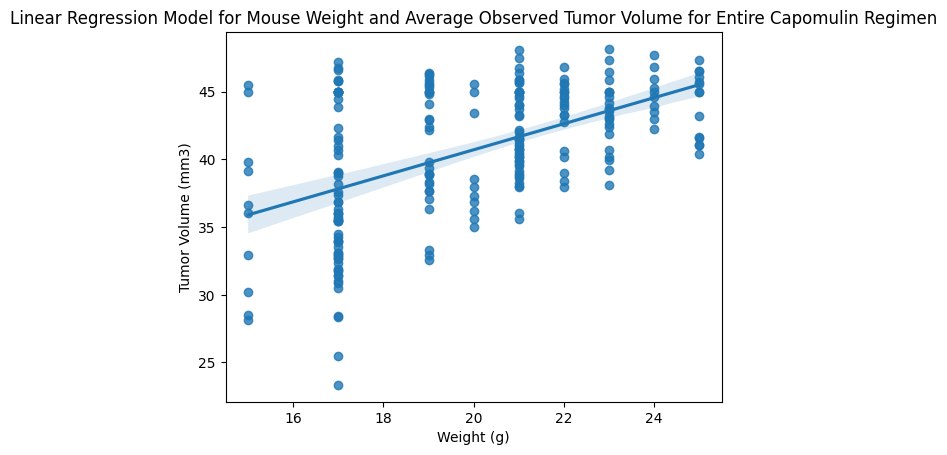

In [164]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import numpy as np
np.corrcoef(capomulin3["Weight (g)"],capomulin3["Tumor Volume (mm3)"])
plt.title("Linear Regression Model for Mouse Weight and Average Observed Tumor Volume for Entire Capomulin Regimen")

sns.regplot(data=capomulin3,x=capomulin3["Weight (g)"],y=capomulin3["Tumor Volume (mm3)"])